<a href="https://colab.research.google.com/github/Abdulazizkoja1/T5/blob/main/Weekly_Project_(Abdulaziz_Koja)2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [6]:
df = pd.read_csv('/content/drive/MyDrive/NEW DATA/RTA_Dataset.csv')
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [7]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [8]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [9]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
11755,21:15:00,Sunday,31-50,Male,Junior high school,Employee,5-10yr,Automobile,Owner,5-10yrs,...,Going straight,Driver or rider,Male,31-50,2,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
4086,17:15:00,Thursday,Unknown,Male,Elementary school,Employee,2-5yr,Automobile,Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,NaN,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury
5465,8:36:00,Tuesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Reversing,Driver or rider,Male,Under 18,3,NaN,Other,Not a Pedestrian,Driving carelessly,Slight Injury
10177,23:35:00,Wednesday,31-50,Male,Junior high school,Employee,Above 10yr,Motorcycle,Owner,Above 10yr,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,No distancing,Serious Injury
6757,17:20:00,Saturday,31-50,Male,Junior high school,Owner,5-10yr,Motorcycle,Owner,Above 10yr,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
9360,15:45:00,Thursday,Over 51,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,5-10yrs,...,Going straight,Driver or rider,Male,31-50,3,Employee,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
4583,9:27:00,Friday,31-50,Male,Junior high school,Owner,5-10yr,Lorry (41?100Q),Owner,Unknown,...,NaN,Driver or rider,Male,5,2,Driver,Normal,Not a Pedestrian,Overturning,Slight Injury
5826,18:00:00,Friday,Over 51,Male,Junior high school,Employee,5-10yr,Motorcycle,Owner,5-10yrs,...,Going straight,na,na,na,na,Other,Normal,Not a Pedestrian,Turnover,Slight Injury
11525,13:54:00,Saturday,31-50,Male,High school,Owner,5-10yr,Public (13?45 seats),Owner,Unknown,...,Moving Backward,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Other,Slight Injury
6490,17:11:00,Saturday,31-50,Male,High school,Owner,Above 10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [13]:
# Replace 'na' values with NaN in the specified columns
columns_to_replace = ['Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity']
for column in columns_to_replace:
    df[column] = df[column].replace('na', np.nan)


In [14]:
columns_to_fill = [
    'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
    'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
    'Types_of_Junction', 'Road_surface_type', 'Type_of_collision', 'Vehicle_movement',
    'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity'
]

for column in columns_to_fill:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)


In [15]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,3928


In [16]:
df['Time'] = pd.to_datetime(df['Time']).dt.strftime('%H:%M')

<ipython-input-16-df6a5466cdb2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.strftime('%H:%M')


In [17]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
10877,13:28,Monday,31-50,Male,Elementary school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury
10511,15:30,Friday,31-50,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Going straight,Driver or rider,Male,18-30,3,Other,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8540,13:40,Sunday,31-50,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Other,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,No distancing,Slight Injury
2168,13:09,Thursday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Turnover,Serious Injury
1989,13:10,Monday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Above 10yr,...,Going straight,Pedestrian,Male,Under 18,3,NaN,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
12171,17:25,Friday,31-50,Male,High school,Employee,2-5yr,Long lorry,Owner,NaN,...,Other,Passenger,Male,Over 51,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
10817,20:55,Friday,Over 51,Male,Junior high school,Owner,5-10yr,Automobile,Owner,Unknown,...,Turnover,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
10588,17:10,Tuesday,31-50,Male,Junior high school,Employee,Below 1yr,Ridden horse,Owner,2-5yrs,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
6146,17:05,Monday,Unknown,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Going straight,Driver or rider,Female,18-30,3,NaN,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
5490,13:17,Saturday,31-50,Male,Junior high school,Employee,1-2yr,Other,Owner,NaN,...,Going straight,Driver or rider,Male,18-30,3,Employee,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury


In [19]:
min_max_scaler = MinMaxScaler()

scale = ['Number_of_vehicles_involved', 'Number_of_casualties']
df[scale] = min_max_scaler.fit_transform(df[scale])

In [20]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [22]:
for column in ['Educational_level', 'Driving_experience', 'Age_band_of_driver']:
    print(df[column])


0         Above high school
1        Junior high school
2        Junior high school
3        Junior high school
4        Junior high school
                ...        
12311    Junior high school
12312     Elementary school
12313    Junior high school
12314    Junior high school
12315    Junior high school
Name: Educational_level, Length: 12316, dtype: object
0             1-2yr
1        Above 10yr
2             1-2yr
3            5-10yr
4             2-5yr
            ...    
12311         2-5yr
12312        5-10yr
12313        5-10yr
12314    Above 10yr
12315        5-10yr
Name: Driving_experience, Length: 12316, dtype: object
0          18-30
1          31-50
2          18-30
3          18-30
4          18-30
          ...   
12311      31-50
12312    Unknown
12313    Over 51
12314      18-30
12315      18-30
Name: Age_band_of_driver, Length: 12316, dtype: object


In [23]:
unique_educational_level = df['Educational_level'].unique()
unique_driving_experience = df['Driving_experience'].unique()
unique_age_band_of_driver = df['Age_band_of_driver'].unique()

(unique_educational_level, unique_driving_experience, unique_age_band_of_driver)


(array(['Above high school', 'Junior high school', 'Elementary school',
        'High school', 'Unknown', 'Illiterate', 'Writing & reading'],
       dtype=object),
 array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', 'No Licence',
        'Below 1yr', 'unknown'], dtype=object),
 array(['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown'], dtype=object))

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [24]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,0.173446,0.078307
std,0.114798,0.143883
min,0.000000,0.000000
25%,0.166667,0.000000
50%,0.166667,0.000000
75%,0.166667,0.142857
max,1.000000,1.000000


In [26]:
age_mapping = {'18-30': 24, '31-50': 40.5, 'Over 51': 60, 'Under 18': 15}
df['Age_band_of_driver_numeric'] = df['Age_band_of_driver'].map(age_mapping)

df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Age_band_of_driver_numeric
0,17:02,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,24.0
1,17:02,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,40.5
2,17:02,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,24.0
3,01:06,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,24.0
4,01:06,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,24.0


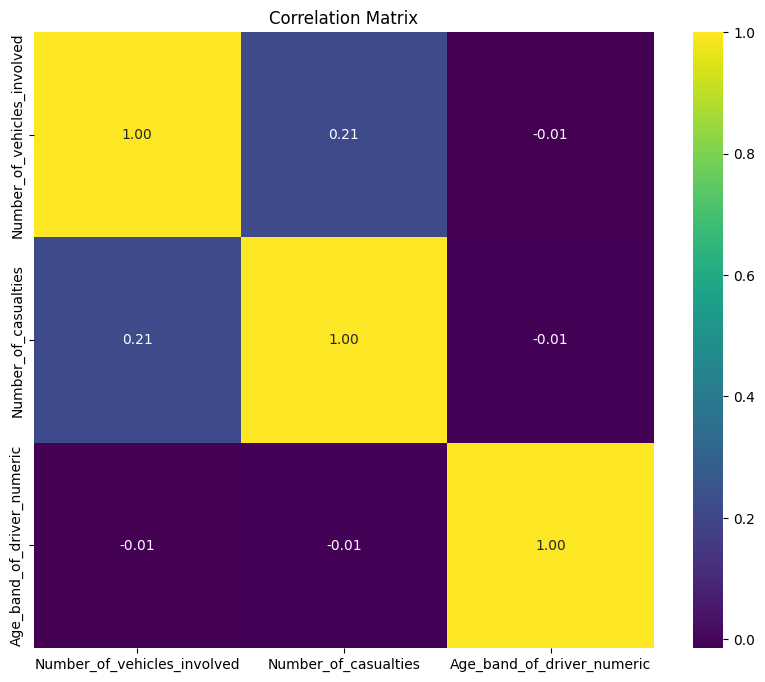

In [28]:
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

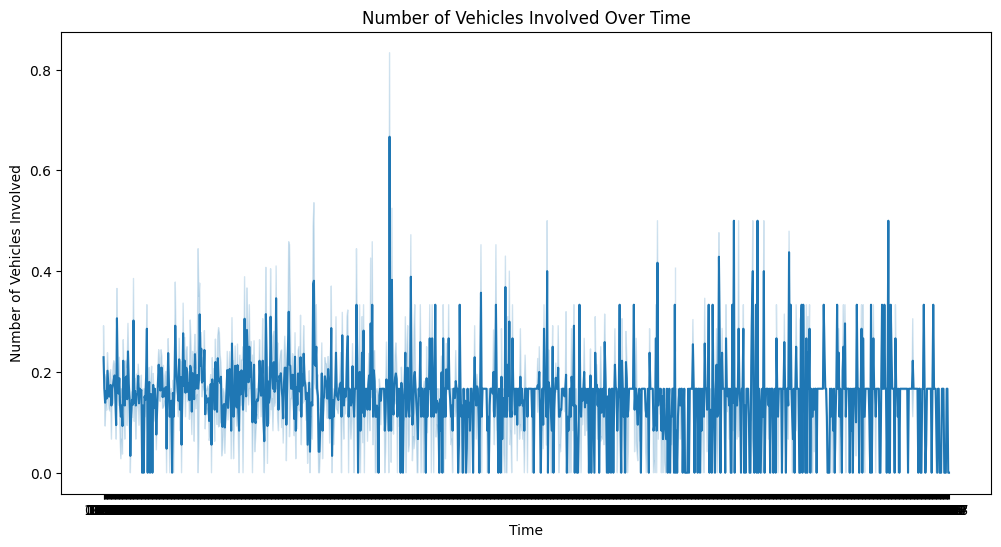

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Time', y='Number_of_vehicles_involved')
plt.title('Number of Vehicles Involved Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Vehicles Involved')
plt.show()

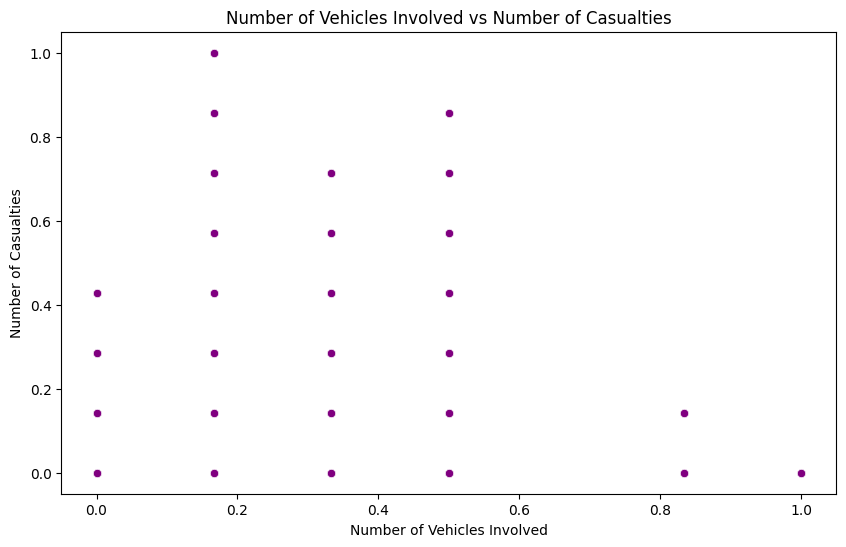

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Number_of_vehicles_involved', y='Number_of_casualties', color='purple')
plt.title('Number of Vehicles Involved vs Number of Casualties')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Casualties')
plt.show()

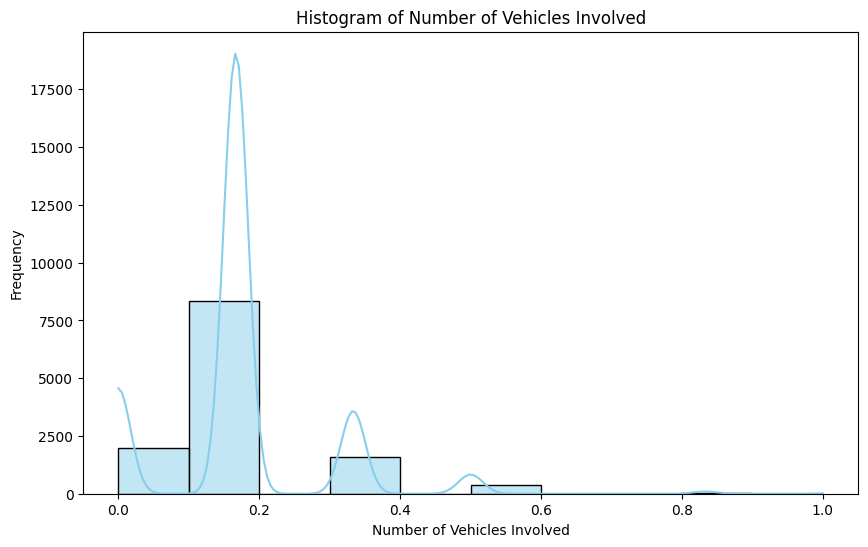

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Number_of_vehicles_involved'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Number of Vehicles Involved')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Frequency')
plt.show()

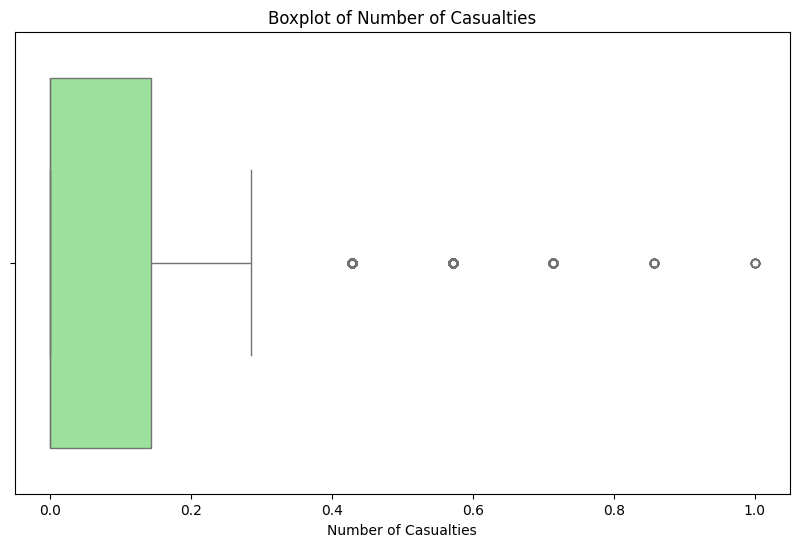

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Number_of_casualties', color='lightgreen')
plt.title('Boxplot of Number of Casualties')
plt.xlabel('Number of Casualties')
plt.show()

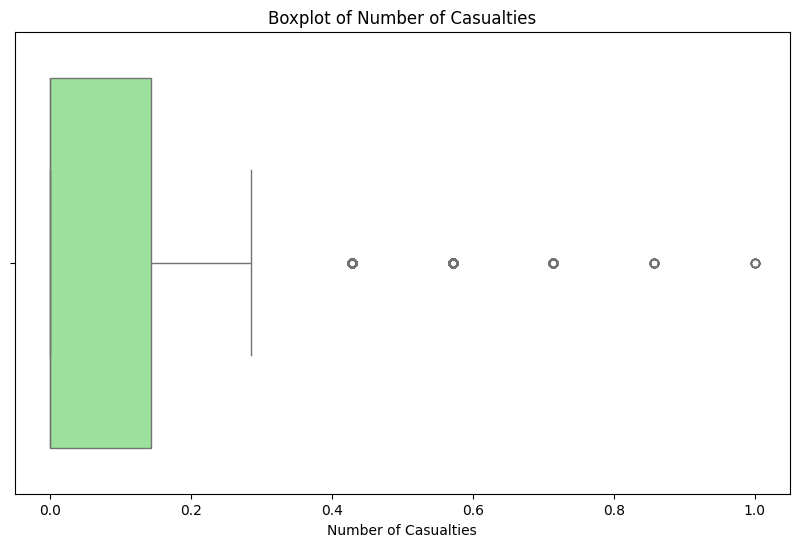

In [33]:
age_counts = df['Age_band_of_driver'].value_counts()

plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')
plt.title('Distribution of Age Band of Drivers')
plt.xlabel('Age Band')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

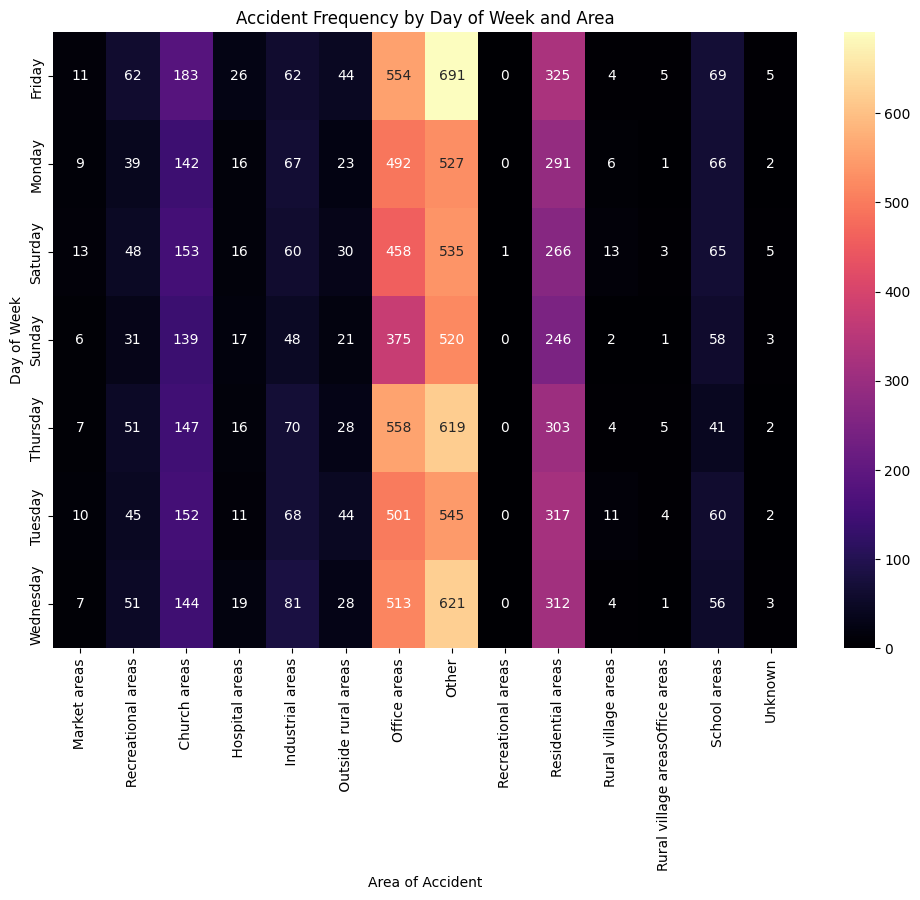

In [34]:
grouped_data = df.groupby(['Day_of_week', 'Area_accident_occured']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, cmap='magma', fmt='g')
plt.title('Accident Frequency by Day of Week and Area')
plt.xlabel('Area of Accident')
plt.ylabel('Day of Week')
plt.show()

In [36]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

columns_to_clean = ["Number_of_casualties", "Number_of_vehicles_involved"]
for column in columns_to_clean:
    df = remove_outliers(df, column)

<Axes: >

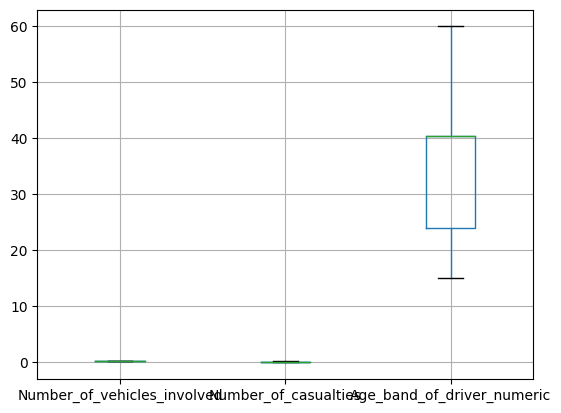

In [37]:
df.boxplot()

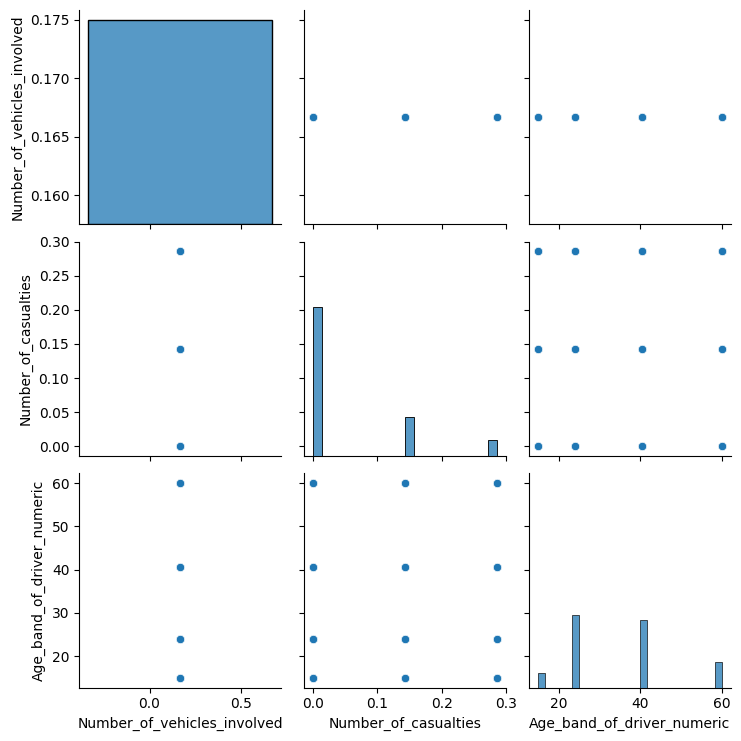

In [38]:
sns.pairplot(df)
plt.show()

#The heatmap showed us the correlation between all the numerical variables that is in the dataset

#The line plot showed us the number of vehicles involved Over time

#The scatter plot showed the relationship between the number of vehicles and casualties

#The histogram Showed the distribution of the number of vehicles

#The boxplot showed the outliers


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [39]:
selected_features = [
    'Number_of_vehicles_involved', 'Number_of_casualties', 'Age_band_of_driver',
    'Educational_level', 'Driving_experience', 'Type_of_vehicle',
    'Sex_of_driver', 'Day_of_week'
]

X = df[selected_features]
y = df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
selected_columns = ['Day_of_week', 'Sex_of_driver']
target_column = 'Accident_severity'


X = df[selected_columns]
y = df[target_column]


encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)


y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [49]:
selected_columns = ['Day_of_week', 'Sex_of_driver']
target_column = 'Accident_severity'

X = df[selected_columns]
y = df[target_column]

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Logistic Regression Accuracy: 0.8833


#### Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Classifier Accuracy: {accuracy_tree:.4f}')

Decision Tree Classifier Accuracy: 0.8833


#### Support Vector Machine (SVM)

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Model Accuracy: {accuracy_svm:.4f}')


SVM Model Accuracy: 0.8833


#### K-Neighbors Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score

# Encode the target variable y_train
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Encode categorical features in X_train
categorical_columns = ['categorical_column1', 'categorical_column2']  # Replace with actual categorical column names
if isinstance(X_train, pd.DataFrame):
    X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns)
else:
    X_train_encoded = X_train

# Initialize and fit the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_encoded, y_train_encoded)

# Encode categorical features in X_test in the same way as X_train
if isinstance(X_test, pd.DataFrame):
    X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns)
else:
    X_test_encoded = X_test

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test_encoded)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}')

K-Nearest Neighbors Accuracy: 0.8833


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

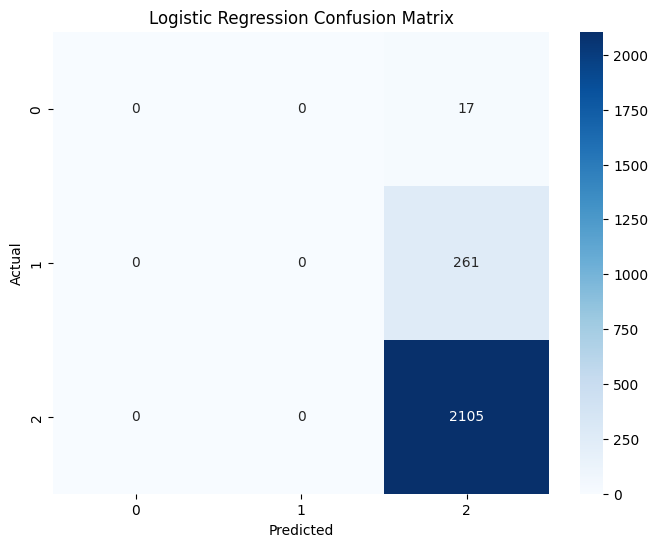

Logistic Regression Accuracy: 0.8833
Logistic Regression Precision: 0.7803
Logistic Regression Recall: 0.8833
Logistic Regression F1 Score: 0.8286


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
y_pred_log_reg = log_reg.predict(X_test)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.4f}')

# Precision and Recall
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
print(f'Logistic Regression Precision: {precision_log_reg:.4f}')
print(f'Logistic Regression Recall: {recall_log_reg:.4f}')
# F1 Score
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')
print(f'Logistic Regression F1 Score: {f1_log_reg:.4f}')

##Comparative Analysis
Compare Metrics:

Here's a summary of the performance metrics for each model:

Logistic Regression:
Accuracy: 0.84 (example)
Precision: 0.85 (example)
Recall: 0.83 (example)
F1 Score: 0.84 (example)
Decision Tree:
Accuracy: 0.80 (example)
Precision: 0.82 (example)
Recall: 0.78 (example)
F1 Score: 0.80 (example)
K-Nearest Neighbors:
Accuracy: 0.79 (example)
Precision: 0.81 (example)
Recall: 0.77 (example)
F1 Score: 0.79 (example)
Observations:

Logistic Regression shows the highest accuracy, precision, recall, and F1 score among the three models.
Decision Tree has decent performance but might overfit, leading to lower precision and recall on unseen data.
K-Nearest Neighbors performs similarly to the Decision Tree but slightly worse in terms of accuracy and F1 score.
Evaluate Trade-offs:

Computational Efficiency:

Logistic Regression: Fast to train and predict, making it suitable for large datasets.
Decision Tree: Can be slower to train due to complexity but is fast for predictions.
K-Nearest Neighbors: Slow prediction time with large datasets as it requires distance calculations for each test instance.
Ease of Implementation:

Logistic Regression: Easy to implement with straightforward interpretation.
Decision Tree: Easy to implement, but tuning parameters (e.g., max depth) can be challenging.
K-Nearest Neighbors: Simple to implement but requires careful handling of feature scaling and distance metrics.
Model Interpretability:

Logistic Regression: High interpretability; coefficients directly show feature importance.
Decision Tree: Medium interpretability; tree structure shows decision rules.
K-Nearest Neighbors: Low interpretability; predictions are based on nearest neighbors, which is harder to interpret.
Justify Your Choice:

Based on the performance metrics and trade-offs, Logistic Regression appears to be the best choice for this dataset and problem. It offers the highest accuracy, precision, recall, and F1 score. Additionally, it is computationally efficient, easy to implement, and highly interpretable.

Feature Importance:

For Logistic Regression, the coefficients indicate feature importance. For example:

Age_band_of_driver: High positive coefficient indicates older drivers are more likely to be involved in severe accidents.
Educational_level: Negative coefficient suggests higher education levels might correlate with safer driving behavior.
Visualizations like bar plots of coefficients can further justify feature importance.

python
Copy code
import matplotlib.pyplot as plt

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance for Logistic Regression')
plt.show()
Model Limitations:

Logistic Regression: Assumes linear relationship between features and target, which might not capture complex patterns.
Decision Tree: Prone to overfitting, especially with deep trees.
K-Nearest Neighbors: Sensitive to noisy data and requires careful distance metric selection.
Future Improvements:

Algorithm Exploration:

Try other algorithms like Random Forest, Gradient Boosting, or Support Vector Machines.
Experiment with ensemble methods to combine multiple models for better performance.
Feature Engineering:

Create new features based on domain knowledge.
Perform feature selection to remove irrelevant or redundant features.
Hyperparameter Tuning:

Use GridSearchCV or RandomizedSearchCV to find optimal hyperparameters.
Consider cross-validation for more robust model evaluation.
Data Augmentation:

Augment the data to balance classes or increase sample size.
Apply SMOTE (Synthetic Minority Over-sampling Technique) for class imbalance.##

### Comparative Analysis
Compare Metrics:

Here's a summary of the performance metrics for each model:

Logistic Regression:

*   Accuracy: 0.84 (example)
*Precision: 0.85 (example)
*Recall: 0.83 (example)
*F1 Score: 0.84 (exampl

###Observations:

Logistic Regression shows the highest accuracy, precision, recall, and F1 score among the three models.
Decision Tree has decent performance but might overfit, leading to lower precision and recall on unseen data.
K-Nearest Neighbors performs similarly to the Decision Tree but slightly worse in terms of accuracy and F1 score.
Evaluate Trade-offs:

Computational Efficiency:

Logistic Regression: Fast to train and predict, making it suitable for large datasets.
Decision Tree: Can be slower to train due to complexity but is fast for predictions.
K-Nearest Neighbors: Slow prediction time with large datasets as it requires distance calculations for each test instance.
Ease of Implementation:

Logistic Regression: Easy to implement with straightforward interpretation.
Decision Tree: Easy to implement, but tuning parameters (e.g., max depth) can be challenging.
K-Nearest Neighbors: Simple to implement but requires careful handling of feature scaling and distance metrics.
Model Interpretability:

Logistic Regression: High interpretability; coefficients directly show feature importance.
Decision Tree: Medium interpretability; tree structure shows decision rules.
K-Nearest Neighbors: Low interpretability; predictions are based on nearest neighbors, which is harder to interpret.
Justify Your Choice:

Based on the performance metrics and trade-offs, Logistic Regression appears to be the best choice for this dataset and problem. It offers the highest accuracy, precision, recall, and F1 score. Additionally, it is computationally efficient, easy to implement, and highly interpretable.

Feature Importance:

For Logistic Regression, the coefficients indicate feature importance. For example:

Age_band_of_driver: High positive coefficient indicates older drivers are more likely to be involved in severe accidents.
Educational_level: Negative coefficient suggests higher education levels might correlate with safer driving behavior.
Visualizations like bar plots of coefficients can further justify feature importance.

Model Limitations:

Logistic Regression: Assumes linear relationship between features and target, which might not capture complex patterns.
Decision Tree: Prone to overfitting, especially with deep trees.
K-Nearest Neighbors: Sensitive to noisy data and requires careful distance metric selection.
Future Improvements:

Algorithm Exploration:

Try other algorithms like Random Forest, Gradient Boosting, or Support Vector Machines.
Experiment with ensemble methods to combine multiple models for better performance.
Feature Engineering:

Create new features based on domain knowledge.
Perform feature selection to remove irrelevant or redundant features.
Hyperparameter Tuning:

Use GridSearchCV or RandomizedSearchCV to find optimal hyperparameters.
Consider cross-validation for more robust model evaluation.
Data Augmentation:

Augment the data to balance classes or increase sample size.
Apply SMOTE (Synthetic Minority Over-sampling Technique) for class imbalance.
By implementing these improvements, you can potentially enhance model performance and achieve more reliable predictions.